In [27]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.zjisti_cenu import zjisti_cenu
import pandas as pd

In [28]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [29]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))

In [30]:
# df = df.explode('008')

In [31]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [32]:
len(df)

855454

In [33]:
df.groupby("rok").size().nlargest()

rok
2008.0    16719
2007.0    16013
2010.0    15910
2009.0    15542
2012.0    15539
dtype: int64

In [34]:
# df = df.dropna(subset=['245_a','100_a','rok'])

In [35]:
df = df.dropna(subset=['245_a','rok'])

In [36]:
df['cena'] = df['020_c'].apply(lambda x: zjisti_cenu(x))

In [37]:
len(df)

849110

In [38]:
df['titul'] = df['245_a'].apply(lambda x: x[0][:-1].strip() if x[0][-1] in [':','/',';','='] else x[0].strip())
df['autorstvo'] = df['100_a'].apply(lambda x: ", ".join([y.replace(',','') for y in x]) if x != None else None)
df['autorstvo_kod'] = df['100_7'].apply(lambda x: x[0] if x != None else None)
df = df.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

In [39]:
len(df)

382271

In [40]:
from src.pocet_stran import pocet_stran

In [41]:
df['stran'] = df['300_a'].apply(lambda x: pocet_stran(x))

In [42]:
df[['300_a','stran']].sample(30)

,300_a,stran
001,,
nkc20122410252,[59 s. :],59.0
nkc20193122863,[224 stran :],224.0
nkc20051632258,[143 s. ;],143.0
ck8406527,[41 s. ;],41.0
np9314122,[49 s. ;],49.0
nkc20051628425,[46 s. :],46.0
nkc20112237791,[222 s. ;],222.0
nos190122696,"[44 s., 2 l. ;]",44.0
bk196800711,"[114, [1] s. ;]",114.0


In [43]:
za_rok = 365 * 12 * 60
za_rok

262800

In [44]:
df.groupby('rok')['stran'].sum().tail()

rok
2020.0    1279217.0
2021.0    1325543.0
2022.0    1302861.0
2023.0    1194321.0
2024.0     635097.0
Name: stran, dtype: float64

<Axes: xlabel='rok'>

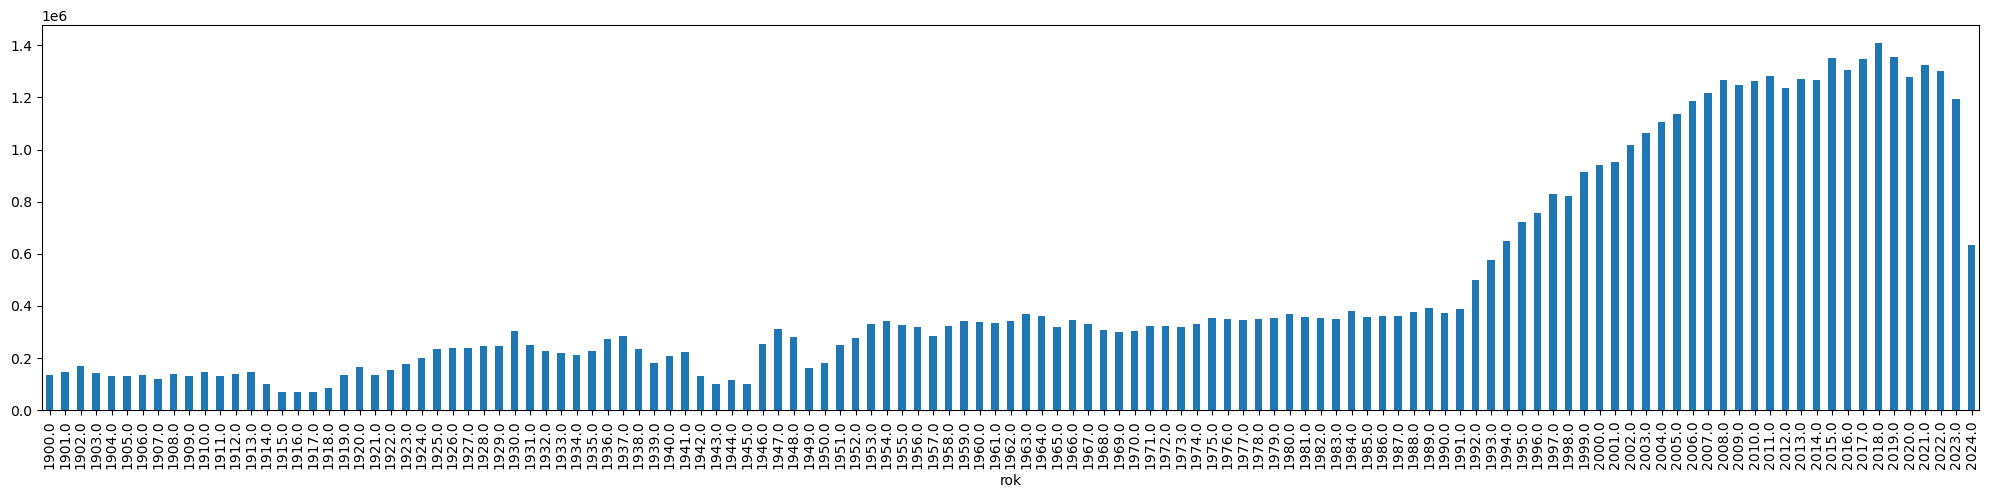

In [45]:
df.groupby('rok')['stran'].sum().plot.bar(figsize=(25,5))

In [46]:
df[df['stran'].notnull()].groupby('rok').size() / df.groupby('rok').size()

rok
1900.0    0.995483
1901.0    0.994234
1902.0    0.999237
1903.0    0.995826
1904.0    0.995701
1905.0    0.996310
1906.0    0.995000
1907.0    0.994783
1908.0    0.992963
1909.0    0.995802
1910.0    0.996243
1911.0    0.995134
1912.0    0.996010
1913.0    0.994669
1914.0    0.998965
1915.0    0.993949
1916.0    0.997214
1917.0    0.997214
1918.0    0.992823
1919.0    0.992491
1920.0    0.996573
1921.0    0.996633
1922.0    0.996497
1923.0    0.993966
1924.0    0.995571
1925.0    0.992593
1926.0    0.994408
1927.0    0.991841
1928.0    0.985986
1929.0    0.975064
1930.0    0.968017
1931.0    0.968500
1932.0    0.962575
1933.0    0.971139
1934.0    0.959254
1935.0    0.961557
1936.0    0.953300
1937.0    0.950589
1938.0    0.955402
1939.0    0.949428
1940.0    0.955473
1941.0    0.944193
1942.0    0.957597
1943.0    0.978972
1944.0    0.993103
1945.0    0.976190
1946.0    0.992174
1947.0    0.994827
1948.0    0.996602
1949.0    0.999278
1950.0    1.000000
1951.0    0.999015
1952.0  

Vyplněnost solidní!

In [48]:
df[['300_a','stran','245_a','rok']].sort_values(by="stran",ascending=False).head(20)

,300_a,stran,245_a,rok
001,,,,
nkc20183048417,[3 svazky (3496 stran) ;],3496.0,Španělsko-český slovník amerikanismů =,2018.0
nkc20091995200,"[2 sv. (xx, 1579, xvii, s.1581-3343) ;]",3343.0,Občanský soudní řád :,2009.0
nkc20203263529,"[2 svazky (xxx, 1-1642; ix, 1643-3331 stran) ;]",3331.0,Trestní zákoník :,2020.0
nos190227417,[2855 s. ;],2855.0,"Buffalo Bill, národní hrdina americký /",1908.0
nkc20132502112,[3 sv. (2733 s.) ;],2733.0,Komentář k zákonu o obchodních korporacích /,2013.0
nos190240810,[2710 s. ;],2710.0,Pražský kat :,1910.0
nkc20092012372,"[2 sv. (clxviii, 1316 s., s. 1317-2684) ;]",2684.0,Římská úmluva a Nařízení Řím I :,2009.0
nos190237542,[2636 s. ;],2636.0,"Královna Draga, záhuba Srbska čili kralovražda...",1903.0
nos190110115,"[3 sv. (1032 s., s. 1035-1736, 1737-2400+ ) :]",2400.0,"Lips Tulian, nejobávanější náčelník lupičů :",1906.0


In [49]:
stihando = df.groupby('rok')['stran'].sum() / za_rok
stihando

rok
1900.0    0.506819
1901.0    0.548969
1902.0    0.645369
1903.0    0.542051
1904.0    0.498037
1905.0    0.498976
1906.0    0.510164
1907.0    0.448219
1908.0    0.519760
1909.0    0.493680
1910.0    0.559262
1911.0    0.495137
1912.0    0.532226
1913.0    0.549878
1914.0    0.380118
1915.0    0.264304
1916.0    0.264943
1917.0    0.268508
1918.0    0.315518
1919.0    0.508143
1920.0    0.629528
1921.0    0.517139
1922.0    0.588828
1923.0    0.678607
1924.0    0.758470
1925.0    0.883843
1926.0    0.898349
1927.0    0.909174
1928.0    0.936788
1929.0    0.940259
1930.0    1.149365
1931.0    0.945088
1932.0    0.858147
1933.0    0.825765
1934.0    0.800533
1935.0    0.862473
1936.0    1.033105
1937.0    1.075529
1938.0    0.896313
1939.0    0.686625
1940.0    0.791134
1941.0    0.848181
1942.0    0.493584
1943.0    0.372698
1944.0    0.441773
1945.0    0.378885
1946.0    0.970811
1947.0    1.177367
1948.0    1.071358
1949.0    0.606020
1950.0    0.686754
1951.0    0.948318
1952.0  

In [93]:
stihando[stihando < 1]

rok
1900.0    0.506819
1901.0    0.548969
1902.0    0.645369
1903.0    0.542051
1904.0    0.498037
1905.0    0.498976
1906.0    0.510164
1907.0    0.448219
1908.0    0.519760
1909.0    0.493680
1910.0    0.559262
1911.0    0.495137
1912.0    0.532226
1913.0    0.549878
1914.0    0.380118
1915.0    0.264304
1916.0    0.264943
1917.0    0.268508
1918.0    0.315518
1919.0    0.508143
1920.0    0.629528
1921.0    0.517139
1922.0    0.588828
1923.0    0.678607
1924.0    0.758470
1925.0    0.883843
1926.0    0.898349
1927.0    0.909174
1928.0    0.936788
1929.0    0.940259
1931.0    0.945088
1932.0    0.858147
1933.0    0.825765
1934.0    0.800533
1935.0    0.862473
1938.0    0.896313
1939.0    0.686625
1940.0    0.791134
1941.0    0.848181
1942.0    0.493584
1943.0    0.372698
1944.0    0.441773
1945.0    0.378885
1946.0    0.970811
1949.0    0.606020
1950.0    0.686754
1951.0    0.948318
Name: stran, dtype: float64

In [50]:
stihando[stihando >= 1]

rok
1930.0    1.149365
1936.0    1.033105
1937.0    1.075529
1947.0    1.177367
1948.0    1.071358
1952.0    1.048482
1953.0    1.258664
1954.0    1.305179
1955.0    1.236895
1956.0    1.217100
1957.0    1.084471
1958.0    1.224467
1959.0    1.303303
1960.0    1.285666
1961.0    1.272842
1962.0    1.299536
1963.0    1.396480
1964.0    1.373862
1965.0    1.210594
1966.0    1.316199
1967.0    1.262675
1968.0    1.163992
1969.0    1.132287
1970.0    1.149734
1971.0    1.221693
1972.0    1.226834
1973.0    1.212104
1974.0    1.251712
1975.0    1.343174
1976.0    1.327329
1977.0    1.315597
1978.0    1.327390
1979.0    1.343881
1980.0    1.400913
1981.0    1.357869
1982.0    1.341435
1983.0    1.334414
1984.0    1.449646
1985.0    1.360225
1986.0    1.377846
1987.0    1.376260
1988.0    1.425205
1989.0    1.493330
1990.0    1.412321
1991.0    1.482260
1992.0    1.897401
1993.0    2.194414
1994.0    2.464418
1995.0    2.739361
1996.0    2.884654
1997.0    3.152835
1998.0    3.125369
1999.0  

In [51]:
df.groupby("rok").size().nlargest()

rok
2008.0    7617
2015.0    7462
2014.0    7353
2018.0    7317
2007.0    7311
dtype: int64

In [52]:
7616 / 16719

0.45552963694000836

In [53]:
df.groupby("rok")["stran"].sum().nlargest()

rok
2018.0    1407889.0
2019.0    1355112.0
2015.0    1351627.0
2017.0    1347787.0
2021.0    1325543.0
Name: stran, dtype: float64

In [54]:
stihando[stihando < 1]

rok
1900.0    0.506819
1901.0    0.548969
1902.0    0.645369
1903.0    0.542051
1904.0    0.498037
1905.0    0.498976
1906.0    0.510164
1907.0    0.448219
1908.0    0.519760
1909.0    0.493680
1910.0    0.559262
1911.0    0.495137
1912.0    0.532226
1913.0    0.549878
1914.0    0.380118
1915.0    0.264304
1916.0    0.264943
1917.0    0.268508
1918.0    0.315518
1919.0    0.508143
1920.0    0.629528
1921.0    0.517139
1922.0    0.588828
1923.0    0.678607
1924.0    0.758470
1925.0    0.883843
1926.0    0.898349
1927.0    0.909174
1928.0    0.936788
1929.0    0.940259
1931.0    0.945088
1932.0    0.858147
1933.0    0.825765
1934.0    0.800533
1935.0    0.862473
1938.0    0.896313
1939.0    0.686625
1940.0    0.791134
1941.0    0.848181
1942.0    0.493584
1943.0    0.372698
1944.0    0.441773
1945.0    0.378885
1946.0    0.970811
1949.0    0.606020
1950.0    0.686754
1951.0    0.948318
Name: stran, dtype: float64

In [55]:
stihando.nlargest(5)

rok
2018.0    5.357264
2019.0    5.156438
2015.0    5.143177
2017.0    5.128565
2021.0    5.043923
Name: stran, dtype: float64

In [56]:
365 * stihando[stihando.index == 1951].iloc[0]

346.1361111111111

In [57]:
df[df['072_x'].astype(str).str.contains('próza',na=False)].groupby("rok")['stran'].sum().tail()

rok
2020.0    402067.0
2021.0    465789.0
2022.0    458593.0
2023.0    438924.0
2024.0    279973.0
Name: stran, dtype: float64

In [58]:
df[df['072_x'].astype(str).str.contains('próza',na=False)].groupby("rok")['stran'].sum().tail() / za_rok

rok
2020.0    1.529935
2021.0    1.772409
2022.0    1.745027
2023.0    1.670183
2024.0    1.065346
Name: stran, dtype: float64

In [59]:
df[df['072_x'].astype(str).str.contains('próza',na=False)].groupby("rok")['stran'].sum().tail() / za_rok

rok
2020.0    1.529935
2021.0    1.772409
2022.0    1.745027
2023.0    1.670183
2024.0    1.065346
Name: stran, dtype: float64

In [60]:
(df[df['072_x'].astype(str).str.contains('próza',na=False) & (df['cena'].notnull())].groupby("rok").size() / df[df['072_x'].astype(str).str.contains('próza',na=False)].groupby("rok").size()).tail(5)

rok
2020.0    0.313617
2021.0    0.311039
2022.0    0.272131
2023.0    0.231087
2024.0    0.296261
dtype: float64

In [61]:
df[df['072_x'].astype(str).str.contains('próza',na=False)].groupby("rok")['cena'].median().tail()

rok
2020.0    299.0
2021.0    299.0
2022.0    349.0
2023.0    349.0
2024.0    369.0
Name: cena, dtype: float64